In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Step 1: Preprocess the data and split it into training and validation sets
data = pd.read_csv("dataset/dataset_membrane_.csv")
# Split the dataset into features (X) and target (y)
X = data[['SW', 'MWCO', 'CA', 'ZP']].values
y = data['Permeance'].values.reshape(-1, 1)  # Reshape to make it a column vector

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Step 2: Define the Linear CNN model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(4, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Absolute Error for metrics


In [10]:
# Step 3: Train the model
history = model.fit(
    X_train.reshape(-1, 4, 1), y_train,
    validation_data=(X_val.reshape(-1, 4, 1), y_val),
    epochs=200,
    batch_size=64,
    verbose=1
)

Epoch 1/200
66/66 [==============================] - 4s 16ms/step - loss: 222.7492 - mae: 8.0527 - val_loss: 79.6460 - val_mae: 3.8078
Epoch 2/200
66/66 [==============================] - 1s 9ms/step - loss: 80.3156 - mae: 3.7906 - val_loss: 79.8846 - val_mae: 4.1301
Epoch 3/200
66/66 [==============================] - 1s 9ms/step - loss: 80.5378 - mae: 3.7870 - val_loss: 79.6047 - val_mae: 3.9088
Epoch 4/200
66/66 [==============================] - 1s 9ms/step - loss: 80.3446 - mae: 3.6715 - val_loss: 80.8129 - val_mae: 4.5466
Epoch 5/200
66/66 [==============================] - 1s 9ms/step - loss: 80.9020 - mae: 3.8689 - val_loss: 79.4138 - val_mae: 3.7130
Epoch 6/200
66/66 [==============================] - 1s 9ms/step - loss: 80.1659 - mae: 3.8420 - val_loss: 79.5582 - val_mae: 3.3868
Epoch 7/200
66/66 [==============================] - 1s 14ms/step - loss: 80.3746 - mae: 3.7236 - val_loss: 79.6139 - val_mae: 3.2911
Epoch 8/200
66/66 [==============================] - 1s 18ms/step 

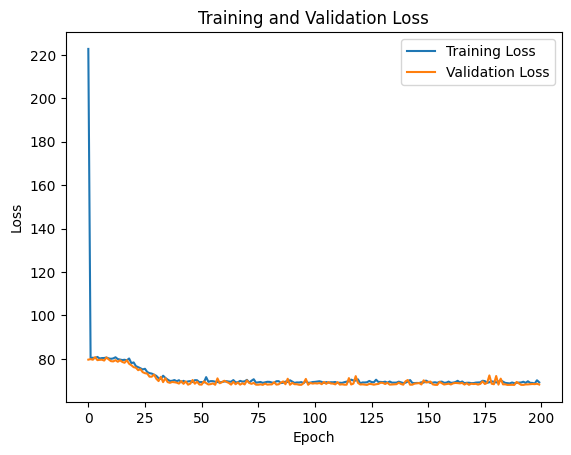

In [11]:
# Step 4: Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [13]:
# Step 5: Save predictions and ground truth as CSV files
y_train_pred = model.predict(X_train.reshape(-1, 4, 1))
y_val_pred = model.predict(X_val.reshape(-1, 4, 1))

train_results = pd.DataFrame({'Ground Truth': y_train.flatten(), 'Prediction': y_train_pred.flatten()})
val_results = pd.DataFrame({'Ground Truth': y_val.flatten(), 'Prediction': y_val_pred.flatten()})

train_results.to_csv('train_predictions.csv', index=False)
val_results.to_csv('CNNPermeance.csv', index=False)
# val_results.to_excel('CNNPermeance.xlsx', index=False)


33/33 [==============================] - 1s 12ms/step


In [ ]:
# Step 6: Evaluate performance
train_loss, train_mae = model.evaluate(X_train.reshape(-1, 4, 1), y_train, verbose=0)
val_loss, val_mae = model.evaluate(X_val.reshape(-1, 4, 1), y_val, verbose=0)

print("Training Loss:", train_loss)
print("Training MAE:", train_mae)
print("Validation Loss:", val_loss)
print("Validation MAE:", val_mae)

Training Loss: 67.79114532470703
Training MAE: 3.2670705318450928
Validation Loss: 67.28359985351562
Validation MAE: 3.1899168491363525


In [18]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X, class_names=y, discretize_continuous=True)

# Explain a single prediction
exp = explainer.explain_instance(X_val[0], model, num_features=4)

# Create a figure and save it
fig = exp.as_pyplot_figure()
fig.savefig('lime_explanation.png')

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'sum'